## Bağlantı yapalım

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


## Gerekli paketleri import edelim

In [3]:
import keras
from keras.datasets import fashion_mnist
from keras.models import load_model
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline 
import random

Using TensorFlow backend.


## Fashion Verilerimizi internetten çekelim

In [4]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Veri setimiz hakkında bir kaç bilgi edinelim

In [5]:
print(f" Eğitim setinin; giriş shapei {x_train.shape}, çıkış shapeleri {y_train.shape} \n Test setinin;giriş shapei {x_test.shape} , çıkış shapei {y_test.shape}")

 Eğitim setinin; giriş shapei (60000, 28, 28), çıkış shapeleri (60000,) 
 Test setinin;giriş shapei (10000, 28, 28) , çıkış shapei (10000,)


### Verilerden bir tane örnek çizelim

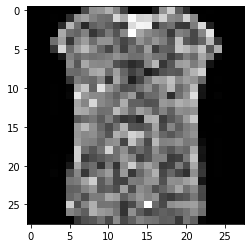

In [ ]:
plt.imshow(x_train[61],cmap="gray")

cmap = "gray"  figürü siyah-beyaz görmemizi sağlar

## 10 sınıfran oluşan Fahion MNIST veri setimizde sınıflandırmaları kendimiz yapalım

In [6]:
fashion_mnist_labels =np.array([
    'Tişört/Üst',
    'Pantolon',
    'Kazak',
    'Elbise',
    'Ceket',
    'Sandalet',
    'Gömlek',
    'Sneaker',
    'Çanta',
    'Bilekte Bot'])

## Modeli eğitmek yerine daha önceden hesaplanmış olan ağırlık ve bias değerlerini bir başka modelden alalım

In [8]:
model = load_model('/content/drive/My Drive/notebooks/modeller/model_fashion-mnist_cnn_train2_epoch24.h5')

ValueError: ignored

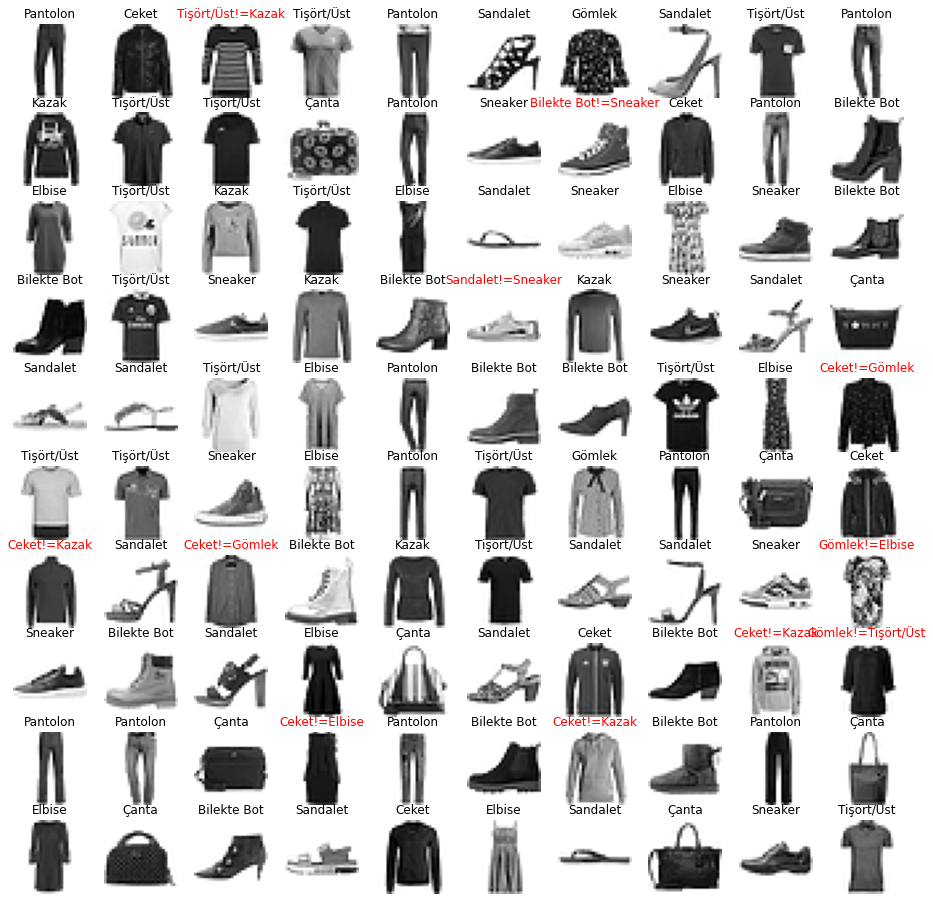

In [20]:
def convertMnistData(image):
    img = image.astype('float32')
    img /= 255

    return image.reshape(1,28,28,1)

plt.figure(figsize=(16,16))

right = 0
mistake = 0
prefictionNum = 200

for i in range(prefictionNum):
    index = random.randint(0, x_test.shape[0])
    image = x_test[index]
    data = convertMnistData(image)

    plt.subplot(10, 10, i+1)
    plt.imshow(image,  cmap=cm.gray_r)
    plt.axis('off')

    ret = model.predict(data, batch_size=1) 
    #yazdır(ret)

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n

    if y_test[index] == bestclass:
        plt.title(fashion_mnist_labels[bestclass])
        right += 1
    else:
        #tahmin edilen sınıf != gerçek sınıf
        plt.title(fashion_mnist_labels[bestclass] + "!=" + fashion_mnist_labels[y_test[index]], color='#ff0000')
        mistake += 1
                                                                   
plt.show()
print("Doğru tahminlerin sayısı:", right)
print("Hata sayısı:", mistake)
print("Doğru tahmin oranı:", right/(mistake + right)*100, '%')

Üstte value error neyden kaynaklı bilmiyorum :((
